In [ ]:
pip install surprise

     |████████████████████████████████| 11.8MB 338kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618284 sha256=8e409fd3ff24c9bb5d69d77d065fe35595cb79e5efd0cc7f2e7bc59fb5e84b4c
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


# READING THE DATASET

In [ ]:
import pandas as pd

df = pd.read_csv('ratings.csv')
df.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Let us now import the necessary packages and convert to surprise readable format using the surprise.dataset function.

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.reader import Reader

reader = Reader(line_format = 'user item rating timestamp',sep=',',skip_lines=1)
data = Dataset.load_from_file('ratings.csv',reader)


Now we will use the train_test_split function to slit the dataset into 75% training and 25% test data set.

In [ ]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25)


# ALGORITHMS

We will be using two algorithms, the KNNBasic and Baseline.We will be setting the parameters for user_based and item_based, And use one of the two similarity metrics(Cosine, Pearson).

In [ ]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.baseline_only import BaselineOnly
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo1 = KNNBasic(k=20,min_k=4,sim_options={'name':'cosine','user_based':True})
algo2 = KNNBasic(k=20,min_k=4,sim_options={'name':'cosine','user_based':False})
algo3 = KNNBasic(k=20,min_k=4,sim_options={'name':'pearson','user_based':True})
algo4 = KNNBasic(k=20,min_k=4,sim_options={'name':'pearson','user_based':False})
algo5 = BaselineOnly(bsl_options=bsl_options)

# RMSE

To compute the RMSE we will use the accuracy function from surprise library. 

In [ ]:
from surprise import accuracy
algo1.fit(trainset)
predictions = algo1.test(testset)
rmse_cu = accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9746


In [ ]:
algo2.fit(trainset)
predictions = algo2.test(testset)
rmse_ci = accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9954


In [ ]:
algo3.fit(trainset)
predictions = algo3.test(testset)
rmse_pu = accuracy.rmse(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9739


In [ ]:
algo4.fit(trainset)
predictions = algo4.test(testset)
rmse_pi = accuracy.rmse(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9853


In [ ]:
algo5.fit(trainset)
predictions = algo5.test(testset)
rmse_b = accuracy.rmse(predictions)

Estimating biases using sgd...
RMSE: 0.9941


# MAE


To compute the MAE we will use the accuracy function from the surprise library.

In [ ]:
algo1.fit(trainset)
predictions = algo1.test(testset)
mae_cu = accuracy.mae(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7472


In [ ]:
algo2.fit(trainset)
predictions = algo2.test(testset)
mae_ci = accuracy.mae(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7797


In [ ]:
algo3.fit(trainset)
predictions = algo3.test(testset)
mae_pu = accuracy.mae(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.7517


In [ ]:
algo4.fit(trainset)
predictions = algo4.test(testset)
mae_pi = accuracy.mae(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.7686


In [ ]:
algo5.fit(trainset)
predictions = algo5.test(testset)
mae_b = accuracy.mae(predictions)

Estimating biases using sgd...
MAE:  0.7905


# Fit time

To compute the Fit_time we will use the cross_validate function.

In [ ]:
from surprise.model_selection.validation import cross_validate

#rm,ma,ft_cu,tt 
cu = cross_validate(algo1,data)
ft_cu = cu['fit_time']

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
ci = cross_validate(algo2,data)
ft_ci = ci['fit_time']

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
pu = cross_validate(algo3,data)
ft_pu = pu['fit_time']

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [ ]:
pi = cross_validate(algo4,data)
ft_pi = pi['fit_time']

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [ ]:
b = cross_validate(algo5,data)
ft_b = b['fit_time']

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


#Benchmarking:
The term benchmarking is used in machine learning (ML) to refer to the evaluation and comparison of ML methods regarding their ability to learn patterns in 'benchmark' datasets that have been applied as 'standards'.

# Benchmarking : RMSE
We will be performing the Benchmarking operation on the RMSE of each algorithm.

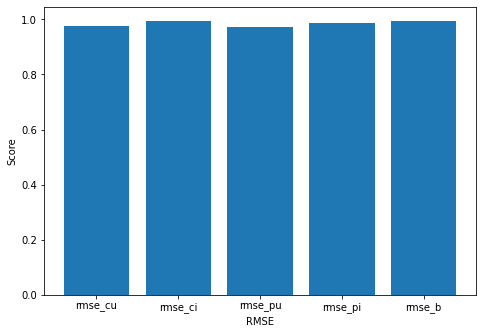

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rmse = ['rmse_cu', 'rmse_ci', 'rmse_pu', 'rmse_pi', 'rmse_b']
score = [rmse_cu,rmse_ci,rmse_pu,rmse_pi,rmse_b]
ax.bar(rmse,score)
plt.xlabel('RMSE')
plt.ylabel('Score')
plt.show()

# Benchmarking: MAE
We will be performing the Benchmarking operation on the MAE of each algorithm.

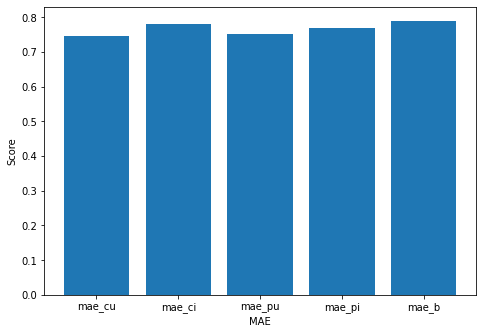

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mae = ['mae_cu', 'mae_ci', 'mae_pu', 'mae_pi', 'mae_b']
score = [mae_cu,mae_ci,mae_pu,mae_pi,mae_b]
ax.bar(mae,score)
plt.xlabel('MAE')
plt.ylabel('Score')
plt.show()

# Benchmarking : Fit_time
We will be performing the Benchmarking operation on the Fit_time of each algorithm.

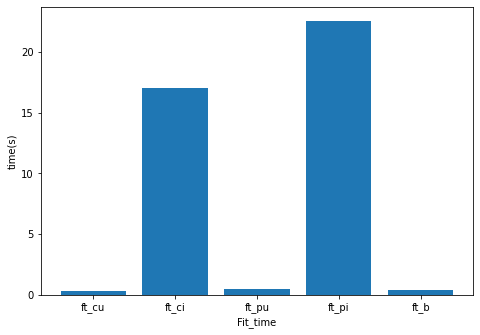

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ft = ['ft_cu','ft_ci','ft_pu','ft_pi','ft_b']
time = [ft_cu[0],ft_ci[0],ft_pu[0],ft_pi[0],ft_b[0]]
ax.bar(ft,time)
plt.xlabel('Fit_time')
plt.ylabel('time(s)')
plt.show()